In [2]:
# importing various libraries
import mahotas
import mahotas.demos
import mahotas as mh
import numpy as np
from pylab import imshow, show
import load_read_name_extractor as lrne
  


In [3]:


img_list, names = lrne.load_name_and_img('cropped/*.jpeg')



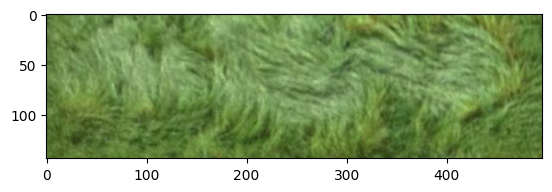

In [4]:
imshow(img_list[0])

In [5]:
def it_find_harlick(img_list):
   features = []
   labels = []
   for i in range(len(img_list)):
      # filtering image
      img_test = img_list[i][:, :, 0]
      
      # adding gaussian filter
      img_test = mahotas.gaussian_filter(img_test, 4)
      
      # setting threshold
      threshed = (img_test > img_test.mean())
      
      # making is labeled image
      labeled, n = mahotas.label(threshed)
      
      # getting haralick features
      h_feature = mahotas.features.haralick(labeled)

      features.append(h_feature.mean(axis=0))
      labels.append(labeled)
   return features, labels


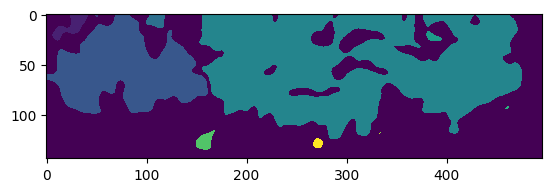

In [6]:
h_features, labeled = it_find_harlick(img_list)
imshow(labeled[0])
show()


In [10]:
print(h_features[0])

[ 0.37035993  0.56101287  0.94964443  5.57055651  0.9771891   4.66612455
 21.72121316  1.69297977  1.7254478   0.07237181  0.20532556 -0.88116386
  0.96637699]


In [7]:
lrne.save_in_txt(h_features, filename="Features/harlick_martin")
lrne.save_in_txt(names, "Features/harlick_martin_names")